In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.types import Date

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Query Measurement for id`, `station`, date, prcp, tobs and `data` and save the query into results
id=[]
station=[]
date=[]
prcp=[]
tobs=[]
data=[]
for row in session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all():
    id.append(row[0])
    station.append(row[1])
    date.append(row[2])
    prcp.append(row[3])
    tobs.append(row[4])


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

('2017-08-23',)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

recent_prcp = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()
        
# pprint(recent_prcp)

In [15]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
# Perform a query to retrieve the data and precipitation scores

p_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_twelve_months).\
                    group_by(Measurement.date).all()
p_results

[('2016-08-24', 39.48333333333333),
 ('2016-08-25', 1.942857142857143),
 ('2016-08-26', 0.4333333333333333),
 ('2016-08-27', 1.6199999999999999),
 ('2016-08-28', 13.15),
 ('2016-08-29', 6.183333333333333),
 ('2016-08-30', 0.3),
 ('2016-08-31', 16.16),
 ('2016-09-01', 0.16),
 ('2016-09-02', 1.2799999999999998),
 ('2016-09-03', 6.4399999999999995),
 ('2016-09-04', 7.040000000000001),
 ('2016-09-05', 2.175),
 ('2016-09-06', 6.26),
 ('2016-09-07', 8.466666666666667),
 ('2016-09-08', 1.9666666666666666),
 ('2016-09-09', 4.55),
 ('2016-09-10', 7.140000000000001),
 ('2016-09-11', 6.34),
 ('2016-09-12', 7.8199999999999985),
 ('2016-09-13', 11.466666666666667),
 ('2016-09-14', 60.449999999999996),
 ('2016-09-15', 21.0),
 ('2016-09-16', 2.9857142857142853),
 ('2016-09-17', 3.44),
 ('2016-09-18', 2.7),
 ('2016-09-19', 1.6600000000000001),
 ('2016-09-20', 3.742857142857143),
 ('2016-09-21', 4.95),
 ('2016-09-22', 5.214285714285714),
 ('2016-09-23', 5.7),
 ('2016-09-24', 1.2),
 ('2016-09-25', 0.383

In [17]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date
prcp_df = pd.DataFrame(recent_prcp, columns = ["Date", "Precipitation"])

# set index to the date column

prcp_df.set_index("Date", inplace=True)

prcp_df


,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [18]:
# convert date column to datetime for formatting in plot

prcp_df.index = pd.to_datetime(prcp_df.index, format="%Y/%m/%d")

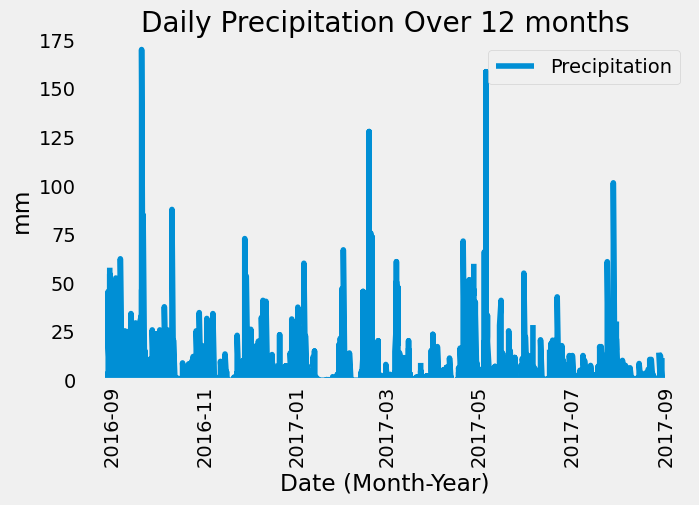

<Figure size 640x480 with 0 Axes>

In [19]:
prcp_plot = prcp_df.plot(figsize=(7,5), ylim=(0,175), title = "Daily Precipitation Over 12 months", rot=90)
prcp_plot.set_ylabel("mm")
prcp_plot.set_xlabel("Date (Month-Year)")
prcp_plot.grid()
plt.show()

plt.savefig("precipitation.png")

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Print the summary statistics for the precipitation data
precipitation = prcp_df["Precipitation"].to_frame()
precipitation.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

s_results = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
s_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

best_station = s_results[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == best_station).all()

[(12.2, 29.4, 22.03582251082252)]

[(12.2, 29.4, 22.03582251082252)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# get the last 12 months of temperature observation data for station USC00519281

tobs_station = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == "USC00519281").all()

tobs_station

[('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 26.7),
 ('USC00519281', 23.9),
 ('USC00519281', 22.8),
 ('USC00519281', 25.6),
 ('USC00519281', 25.0),
 ('USC00519281', 25.6),
 ('USC00519281', 26.7),
 ('USC00519281', 26.7),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 22.8),
 ('USC00519281', 23.3),
 ('USC00519281', 26.7),
 ('USC00519281', 26.1),
 ('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 24.4),
 ('USC00519281', 26.1),
 ('USC00519281', 23.9),
 ('USC00519281', 26.1),
 ('USC00519281', 25.6),
 ('USC00519281', 26.1),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 24.4),
 ('USC00519281', 23.3),
 ('USC00519281', 25.0),
 ('USC00519281', 25.6),
 ('USC00519281', 26.1),
 ('USC00519281', 26.1),
 ('USC00519281', 25.0),
 ('USC00519281', 26.7),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.6),
 ('USC00519281', 25.0),
 ('USC00519281', 26.1),
 ('USC00519281', 26.1),
 ('USC00519281',

In [25]:
# convert results to a dataframe for plotting
station_temp_df = pd.DataFrame(tobs_station, columns=["Station", "Temp. Observations"])
station_temp_df

,Station,Temp. Observations
0,USC00519281,25.0
1,USC00519281,26.7
2,USC00519281,26.7
3,USC00519281,23.9
4,USC00519281,22.8
...,...,...
346,USC00519281,25.0
347,USC00519281,25.0
348,USC00519281,24.4
349,USC00519281,24.4


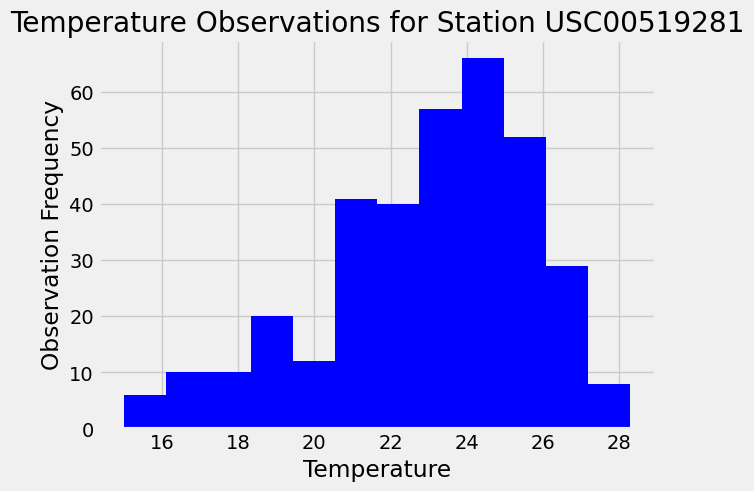

<Figure size 640x480 with 0 Axes>

In [26]:
# Plot the results as a histogram with bins=12.
station_temp_df["Temp. Observations"].hist(bins=12, color="blue")
plt.title("Temperature Observations for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Observation Frequency")
plt.show()

plt.savefig("station-histogram.png")

In [ ]:
<function matplotlib.pyplot.show(*args, **kw)>

Text(0.5, 4.183333333333314, 'Temperature')

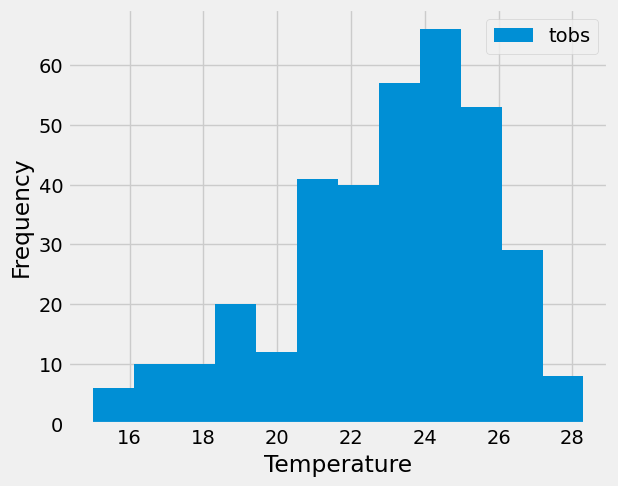

# Close Session

In [27]:
# Close Session
session.close()